<a href="https://colab.research.google.com/github/WinterBlue16/keras/blob/master/keras27_cifar1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import cifar10

In [4]:
from keras.models import Sequential 
from keras.layers import Dense, Flatten, LSTM, Conv2D, MaxPooling2D, Reshape
from keras.callbacks import EarlyStopping 
import numpy as np

# 1. 데이터 불러오기
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# print(x_train)
# print(y_train)
print(x_train.shape)
print(y_train.shape)

170500096/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3)
(50000, 1)


In [5]:
# 2. 데이터 전처리
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3).astype('float32')/255
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3).astype('float32')/255

# print(type(x_train))

# 2-1. One-hot-Encoding
# softmax를 적용하기 위한 필수적인 과정
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

print(y_train.shape) # 분류 클래스 개수만큼 생성


(50000, 10)


In [6]:
# 3. model 만들기
model = Sequential()
model.add(Conv2D(10, (2, 2), padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(32))
model.add(Dense(10, activation='softmax'))# activation은 add()가 아닌 Dense()에 포함되어 있다!

model.summary()





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 10)        130       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 10)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2560)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                81952     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 82,412
Trainable params: 82,412
Non-trainable params: 0
_________________________________________________________________


In [8]:
# 4. Model 훈련하기
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='loss', patience=20)
hist = model.fit(x_train, y_train, validation_split=0.2, 
          epochs=10, batch_size=8, verbose=1,
          callbacks=[early_stopping])

acc = model.evaluate(x_test, y_test)
print(acc)
print(hist.history.keys())

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 43s 1ms/step - loss: 1.0945 - acc: 0.6199 - val_loss: 1.2865 - val_acc: 0.5588
Epoch 2/10
40000/40000 [==============================] - 41s 1ms/step - loss: 1.0790 - acc: 0.6304 - val_loss: 1.2903 - val_acc: 0.5709
Epoch 3/10
40000/40000 [==============================] - 40s 995us/step - loss: 1.0719 - acc: 0.6311 - val_loss: 1.2751 - val_acc: 0.5679
Epoch 4/10
40000/40000 [==============================] - 40s 1ms/step - loss: 1.0642 - acc: 0.6314 - val_loss: 1.2700 - val_acc: 0.5722
Epoch 5/10
40000/40000 [==============================] - 39s 975us/step - loss: 1.0536 - acc: 0.6353 - val_loss: 1.2871 - val_acc: 0.5644
Epoch 6/10
40000/40000 [==============================] - 38s 950us/step - loss: 1.0445 - acc: 0.6410 - val_loss: 1.2799 - val_acc: 0.5757
Epoch 7/10
40000/40000 [==============================] - 39s 973us/step - loss: 1.0350 - acc: 0.6409 - val_loss: 1.2941 -

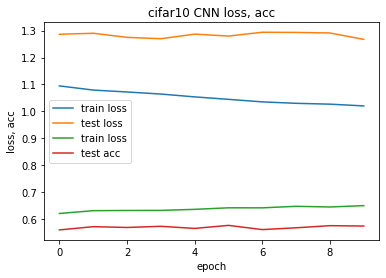

In [9]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('cifar10 CNN loss, acc')
plt.xlabel('epoch')
plt.ylabel('loss, acc')
plt.legend(['train loss', 'test loss', 'train loss', 'test acc'])
plt.show()